In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/semiprocessed_data.csv')

In [3]:
clustering_data = df.drop(columns=['Price'])

In [4]:
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [5]:
pd.DataFrame(clustering_data_scaled, columns=clustering_data.columns).head()

,Year,Mileage,Make,Model
0,0.208158,-0.399696,-1.499791,-0.105865
1,-0.084670,-0.783582,-1.499791,-0.107170
2,-0.084670,-0.087089,-1.499791,-0.105865
3,0.208158,-0.299741,-1.499791,-0.107170
4,0.793812,-0.723186,-1.499791,-0.103255


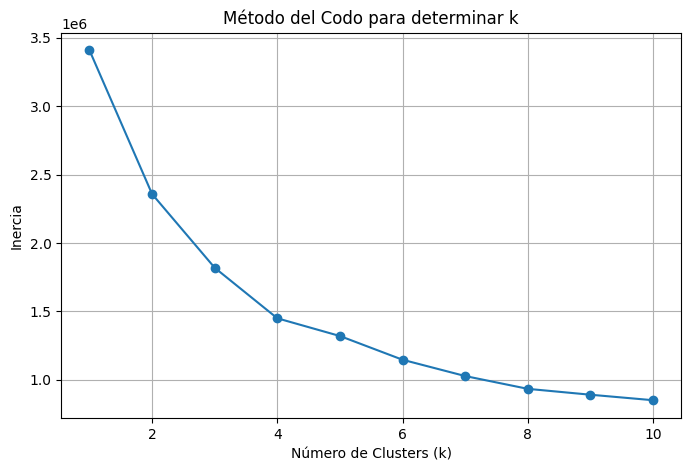

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar diferentes números de clusters (k)
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.grid(True)
plt.show()


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(clustering_data_scaled)

# Obtener los labels de los clusters asignados
cluster_labels = kmeans.labels_

# Agregar los labels al DataFrame original
df_clusters = pd.DataFrame(clustering_data_scaled, columns=clustering_data.columns)
df_clusters['Cluster'] = cluster_labels

# Mostrar ejemplos de los datos con los clusters
print(df_clusters.head())

       Year   Mileage      Make     Model  Cluster
0  0.208158 -0.399696 -1.499791 -0.105865        0
1 -0.084670 -0.783582 -1.499791 -0.107170        0
2 -0.084670 -0.087089 -1.499791 -0.105865        0
3  0.208158 -0.299741 -1.499791 -0.107170        0
4  0.793812 -0.723186 -1.499791 -0.103255        0


In [8]:
# Contar cuántos datos hay en cada cluster
cluster_counts = df_clusters['Cluster'].value_counts()
print("Cantidad de puntos por cluster:")
print(cluster_counts)

Cantidad de puntos por cluster:
Cluster
0    266482
3    230843
1    203927
2    150870
Name: count, dtype: int64


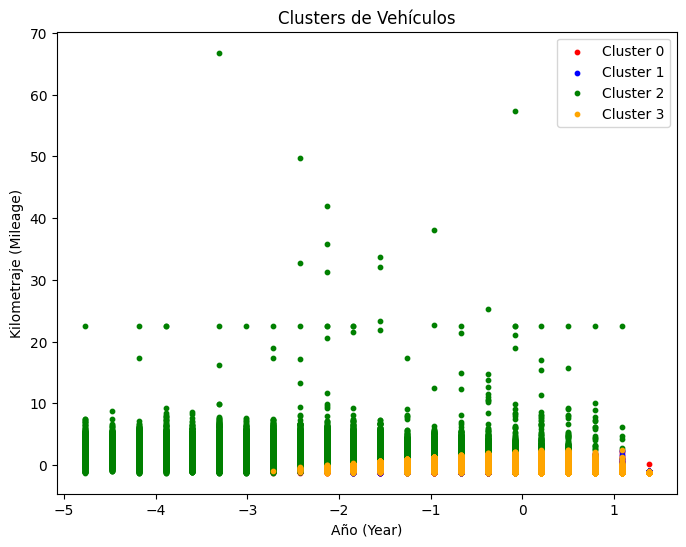

In [9]:
import matplotlib.pyplot as plt

# Asignar colores a cada cluster
colors = ['red', 'blue', 'green', 'orange']

# Graficar los clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = df_clusters[df_clusters['Cluster'] == cluster]
    plt.scatter(cluster_data['Year'], cluster_data['Mileage'], 
                s=10, color=colors[cluster], label=f'Cluster {cluster}')
    
plt.title("Clusters de Vehículos")
plt.xlabel("Año (Year)")
plt.ylabel("Kilometraje (Mileage)")
plt.legend()
plt.show()


In [10]:
# Obtener los centroides
centroids = kmeans.cluster_centers_
print("Centroides de los Clusters:")
print(centroids)


Centroides de los Clusters:
[[ 0.34339723 -0.31628619 -0.68532671 -0.76450357]
 [ 0.42001942 -0.34758316 -0.49776763  1.07516586]
 [-1.7272855   1.58778546 -0.06735775  0.09993399]
 [ 0.36148434 -0.36556087  1.27502082 -0.13100995]]


In [11]:
df['Cluster'] = df_clusters['Cluster']
df.to_csv("data_with_clusters.csv", index=False)
print("Datos con clusters guardados.")


Datos con clusters guardados.


In [12]:
cluster_summary = df.groupby('Cluster').mean()
print("Resumen de características por cluster:")
print(cluster_summary)


Resumen de características por cluster:
                Price         Year   Mileage       Make        Model
Cluster                                                             
0        22029.135045  2014.463228  0.013723  14.300583   688.734522
1        26188.816812  2014.721268  0.013285  17.351822  2098.532612
2        11296.309969  2007.390628  0.041725  24.386724  1351.509737
3        23283.283024  2014.523702  0.013008  46.302184  1174.741469


In [13]:
cluster_summary = df.groupby('Cluster').describe()
print(cluster_summary)


            Price                                                        \
            count          mean           std     min      25%      50%   
Cluster                                                                   
0        266482.0  22029.135045  13292.816093  1718.0  14500.0  19000.0   
1        203927.0  26188.816812  13121.891323  1899.0  16733.0  23795.0   
2        150870.0  11296.309969   6990.022208  1500.0   6991.0   9950.0   
3        230843.0  23283.283024  14261.375983  2990.0  14995.0  19909.0   

                                Year               ...  Make           Model  \
             75%       max     count         mean  ...   75%   max     count   
Cluster                                            ...                         
0        26988.0  469991.0  266482.0  2014.463228  ...  21.0  35.0  266482.0   
1        32981.0  469973.0  203927.0  2014.721268  ...  26.0  41.0  203927.0   
2        13999.0  299999.0  150870.0  2007.390628  ...  38.0  57.0  150870

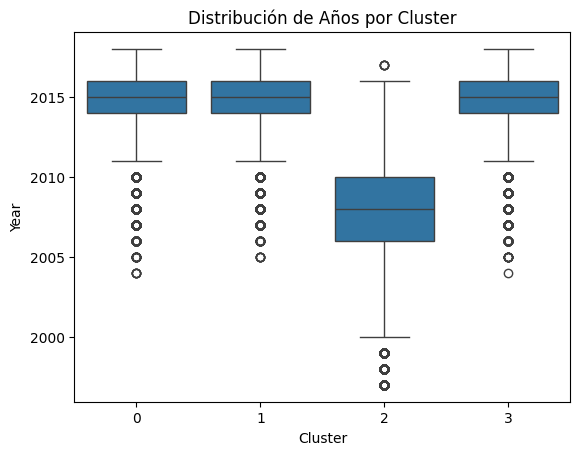

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Year', data=df)
plt.title("Distribución de Años por Cluster")
plt.show()


In [16]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")


['kmeans_model.pkl']